<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#HAR-and-HAR-X-model" data-toc-modified-id="HAR-and-HAR-X-model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>HAR and HAR-X model</a></span></li></ul></div>

# HAR and HAR-X model

Add more variables (J=3 the common number of J) is based on variables that could enhance the predictability.

$$
a_t = \varepsilon_t \sqrt{\omega + \alpha_1 a_{t-1}^2 + \alpha_2 a_{t-2}^2 + \beta_1 \sigma_{t-1}^2 + \beta_2 \sigma_{t-2}^2}
$$

$$
a_0, a_1 \sim \mathcal{N}(0,1)
$$

$$
\sigma_0 =1, \sigma_1 = 1
$$

$$
\varepsilon_t \sim \mathcal{N}(0,1)
$$

In [1]:
import pandas as pd
import numpy as np
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant


from IPython.display import display, HTML
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import random as rd
import warnings
import pandas as pd

display(HTML("<style>.container { width:80% !important; }</style>"))
warnings.filterwarnings('ignore')

In [2]:
FTSE_volatility_df = pd.read_csv('../data/1.1-FTSE_VOL-PRICES_2006-2023.csv')
ticker = 'BARC'

sample_df = FTSE_volatility_df[FTSE_volatility_df.Ticker == ticker]
sample_df = sample_df[sample_df['V^YZ'].notnull()].reset_index(drop=True)
display(sample_df)

,Unnamed: 0,Month,Date,Asset,Currency,PermID,Ticker,RIC,Open,High,...,O_i,u_i,d_i,c_i,V^O,V^C,temp_RS,V^CC,V^RS,V^YZ
0,1934,2006-01-01,2006-01-10,8589934333,GBP,8589934333,BARC,BARC.L,5.631573,5.631573,...,-0.003190,0.000000,-0.013671,-0.011245,0.004509,0.008491,0.000033,0.012363,0.010122,0.010916
1,1935,2006-01-01,2006-01-11,8589934333,GBP,8589934333,BARC,BARC.L,5.618079,5.654063,...,0.008846,0.006385,-0.007232,0.003197,0.004501,0.007798,0.000096,0.011434,0.009964,0.010721
2,1936,2006-01-01,2006-01-12,8589934333,GBP,8589934333,BARC,BARC.L,5.636071,5.694546,...,0.000000,0.010322,-0.003197,0.003187,0.004501,0.007222,0.000094,0.010369,0.010724,0.011302
3,1937,2006-01-01,2006-01-13,8589934333,GBP,8589934333,BARC,BARC.L,5.645067,5.663059,...,-0.001592,0.003182,-0.013638,-0.010413,0.004844,0.007023,0.000087,0.011009,0.011386,0.011978
4,1938,2006-01-01,2006-01-16,8589934333,GBP,8589934333,BARC,BARC.L,5.586592,5.591090,...,0.000000,0.000805,-0.009709,-0.000805,0.004681,0.007145,0.000088,0.010929,0.008922,0.009904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,419657,2023-04-01,2023-04-24,8589934333,GBP,8589934333,BARC,BARC.L,1.523000,1.550299,...,-0.006153,0.017766,-0.001451,0.012398,0.007039,0.009089,0.000115,0.006436,0.012050,0.013684
4368,419658,2023-04-01,2023-04-25,8589934333,GBP,8589934333,BARC,BARC.L,1.535200,1.542400,...,-0.004419,0.004679,-0.017611,-0.013509,0.005085,0.010982,0.000157,0.009484,0.012111,0.013016
4369,419659,2023-04-01,2023-04-26,8589934333,GBP,8589934333,BARC,BARC.L,1.514600,1.544800,...,0.000000,0.019743,-0.011821,0.015722,0.005254,0.013388,0.000405,0.013101,0.014710,0.015477
4370,419660,2023-04-01,2023-04-27,8589934333,GBP,8589934333,BARC,BARC.L,1.562200,1.624746,...,0.015222,0.039257,-0.005263,0.036578,0.009229,0.018782,0.000325,0.027399,0.014964,0.018014


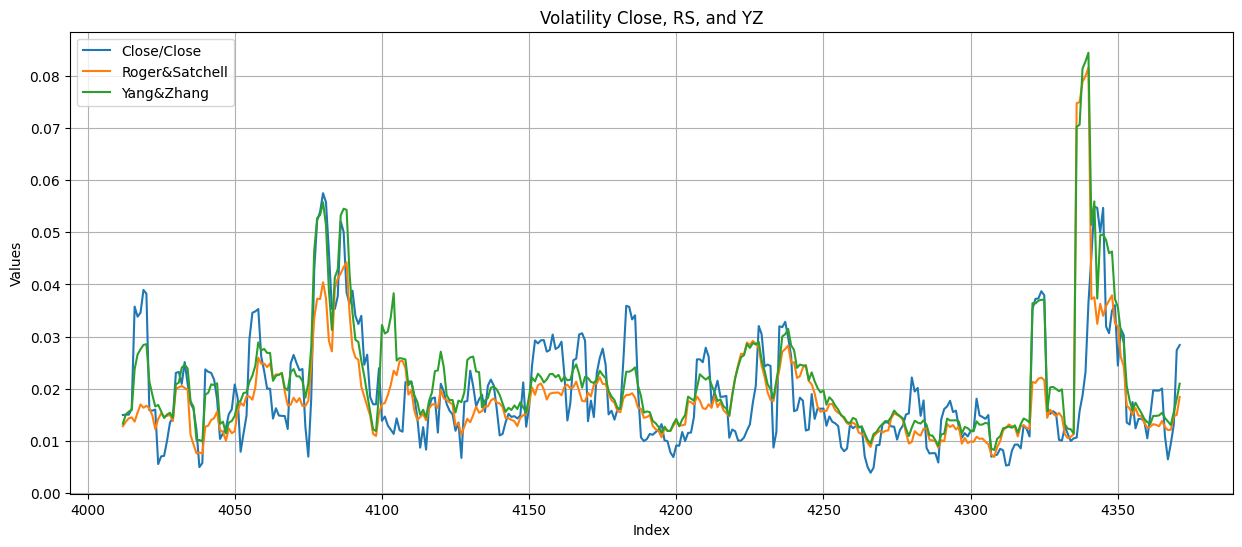

In [3]:
sample_5m = sample_df.iloc[-30*12:, :]

plt.figure(figsize=(15, 6))

# Plot each column
plt.plot(sample_5m['V^CC'], label='Close/Close')
plt.plot(sample_5m['V^RS'], label='Roger&Satchell')
plt.plot(sample_5m['V^YZ'], label='Yang&Zhang')

# Optionally, add grid
plt.grid(True)

# Add legend to distinguish each line
plt.legend()

# Add title and labels
plt.title('Volatility Close, RS, and YZ')
plt.xlabel('Index')
plt.ylabel('Values')

# Display the plot
plt.show()

In [4]:
# Assume you have a DataFrame df with your time series in a column 'volatility'
volatility = sample_5m['V^YZ']

# Create lags for daily, weekly and monthly volatility
volatility_lag_daily = volatility.shift(1)
volatility_lag_weekly = volatility.rolling(5).mean().shift(1)
volatility_lag_monthly = volatility.rolling(22).mean().shift(1)

# Create a DataFrame for the regression
df_regression = pd.DataFrame({
    'volatility': volatility,
    'volatility_lag_daily': volatility_lag_daily,
    'volatility_lag_weekly': volatility_lag_weekly,
    'volatility_lag_monthly': volatility_lag_monthly,
})

df_regression = df_regression.dropna()

In [5]:
test_size = int(df_regression.shape[0]*0.2)

In [6]:
df_train, df_test = df_regression.iloc[:-test_size,], df_regression.iloc[-test_size:,]

In [7]:
y_train = df_train['volatility']

# Define the independent variables
X_train = df_train[['volatility_lag_daily', 'volatility_lag_weekly', 'volatility_lag_monthly']]

# Add a constant to the independent variables matrix
X_train = add_constant(X_train)

# Fit the model
model = OLS(y_train, X_train)
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:             volatility   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     624.1
Date:                Wed, 05 Jul 2023   Prob (F-statistic):          2.74e-120
Time:                        14:54:34   Log-Likelihood:                 1198.0
No. Observations:                 271   AIC:                            -2388.
Df Residuals:                     267   BIC:                            -2374.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [8]:
y_test = df_test['volatility']

# Define the independent variables
X_test = df_test[['volatility_lag_daily', 'volatility_lag_weekly', 'volatility_lag_monthly']]

# Add a constant to the independent variables matrix
X_test = add_constant(X_test)

In [9]:
X_test

,const,volatility_lag_daily,volatility_lag_weekly,volatility_lag_monthly
4305,1.0,0.013108,0.012721,0.012442
4306,1.0,0.013437,0.013034,0.012449
4307,1.0,0.013272,0.013326,0.012420
4308,1.0,0.008496,0.012280,0.012212
4309,1.0,0.008223,0.011307,0.012083
...,...,...,...,...
4367,1.0,0.014374,0.014829,0.024595
4368,1.0,0.013684,0.014613,0.022963
4369,1.0,0.013016,0.014263,0.021350
4370,1.0,0.015477,0.014385,0.019962


In [10]:
y_pred = model_fit.predict(X_test)

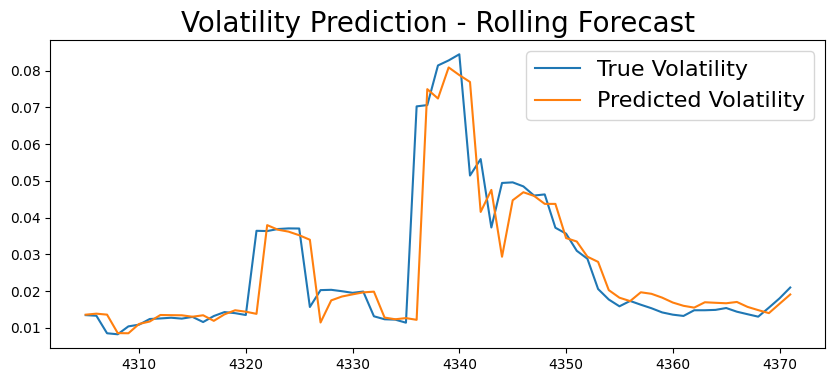

In [11]:
plt.figure(figsize=(10,4))
true, = plt.plot(y_test)
preds, = plt.plot(y_pred)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

In [12]:
mse_million = mean_squared_error(y_test,y_pred)*10**6

In [13]:
GARCH_results = pd.DataFrame({
    'Model':'Heterogeneous AutoRegressive',
    'Test Size': test_size,
    'MSE^6':mse_million
             }
    , index=[0]
)
display(GARCH_results)

,Model,Test Size,MSE^6
0,Heterogeneous AutoRegressive,67,91.82405
